# Importation des bobliothéques

In [84]:
import tensorflow.keras
from tensorflow.keras.models import model_from_json
import matplotlib.pyplot as plt
import sklearn
import joblib
from pathlib import Path
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.applications import vgg16
from tensorflow.keras.datasets import cifar10

# Chargement des Modèles

### Chargement du modèle d'extraction de caractéristiques 

In [85]:
# chargement du model d'extraction de caractéristiques (VGG15_CNN)
# Chargement du fichier json contenant la structure du modèle 
f = Path('../1_Extraction_de_Carct/model_extr_feat_structure.json')
model_feat_extrc_structure = f.read_text()
# Recréer l'objet du  model Keras à partir des données json
feat_extrac_model = model_from_json(model_feat_extrc_structure)
# Recharger les poids entraînés du model
feat_extrac_model.load_weights("../1_Extraction_de_Carct/model_extr_feat_structure_weights.h5")

### Chargement du modèle de prédiction 

In [86]:
# chargement du modèle de prédiction (MLP)
# Chargement du fichier json contenant la structure du modèle 
f = Path('../2_Cration_MLP/mlp_structure.json')
pred_structure = f.read_text()
# Recréer l'objet du  model Keras à partir des données json
pred_model = model_from_json(pred_structure)
# Recharger les poids entraînés du model
pred_model.load_weights("../2_Cration_MLP/mlp_weights.h5")

### Chargement du modèle d'explication

In [87]:
# chargement du modèle d'explication (KNN)
explain_model = joblib.load('../4_Construction_KNN/KNN.pkl')

/opt/anaconda3/envs/esi/lib/python3.6/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator KNeighborsClassifier from version 0.23.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


### Chargement du Datset

In [88]:
#Importer le jeu de données cifar pour montrer les voisins les plus proches
(x_neighbors,y_neighbors),(x_tst_neighbors,y_tst_neighbors) = cifar10.load_data()

# Système CNN-KNN Interpretable 
Nous créons ici une fonction qui prend en entrée :
* Une image d'entrée
* Nos modèles : modèle d'exraction de caractéristiques, modèle de prédiction, et modèle d'explication
* Notre dataset
* Le nombre d'explications souhaitées

Et nous renvoie en sortie :
* La prédiction
* L'explication visuelle parmi le dataset

In [89]:
# définition de la fonction
def twin_CNN_KNN_explainable_Model(img_path,feat_extrac_model,pred_model,explain_model,nb_expl):
    print("####### Réalisé par Mohamed Ameziane TOUIL ########")
    print("####### twin_CNN_KNN_explainable_Model ########")
    
    ### ... Début Module d'acquisition ... ###
    # redimensionner l'image à 32x32 pixels comme requis par le modèle
    img = image.load_img(img_path, target_size=(32,32))
    img2 = image.load_img(img_path)
    # Convertir l'image en un tableau numérique
    image_array = image.img_to_array(img)
    # Ajouter une quatrième dimension à l'image (puisque Keras s'attend à un ensemble d'images, pas une seule)
    images = np.expand_dims(image_array, axis=0)
    # Normaliser les données
    images = vgg16.preprocess_input(images)
    ### ... Fin Module d'acquisition ... ###
    
    ### ... Début Module d'extraction de caractéristiques ... ###
    # Utiliser le Modèle d'extraction de caractéristiques de notre image de test 
    features = feat_extrac_model.predict(images)
    ### ... Fin Module d'extraction de caractéristiques ... ###
    
    ### ... Début Module de Prédiction ... ###
    #Noms des classes
    class_labels = ["Avion","Voiture","Oiseau","Chat","Cerf","Chien","Grenouille","Cheval","Bateau","Camion"]
    # Compte tenu des caractéristiques extraites, obtenir une prédiction finale en utilisant notre propre modèle
    results = pred_model.predict(features)
    single_result = results[0]
    #Trouvez l'indice de la classe avec la plus haute prédiction
    most_likely_class_index = int(np.argmax(single_result))
    #Obtenir la valeur de prédiction
    class_prediction = single_result[most_likely_class_index]
    #Obtenir le nom du label de classe
    class_label = class_labels[most_likely_class_index]
    
    #Affichage de notre image d'entrée
    plt.figure(figsize=(4,4))
    plt.subplot(1,1,1)
    plt.imshow(img2)
    plt.title('L\'image est : '+ str(class_label)+' - probabilité : '+ str(class_prediction))
    ### ... Fin Module de Prédiction ... ###
    
    ### ... Début Module d'Explication ... ###
    #Obtenir les nb_expl d'explication
    features = features.reshape(features.shape[0],512)
    explain_prediction = explain_model.predict(features)
    k_samples = explain_model.kneighbors(features,n_neighbors=nb_expl,return_distance=True)
    # Affichage des images
    fig=plt.figure(figsize=(15, 15))
    for i in range(nb_expl):
        fig.add_subplot(4,4,i+1)
        img = x_neighbors[k_samples[1][0][i]]
        plt.imshow(img)
        plt.title('Explication N° : ' + str(i+1))
    plt.show()
    ### ... Fin Module d'Explication ... ###
        
    return

# Exécution et disscussions des résultats (Démo)
### Cas N°1 : Bonne prédiction / Explication

####### Réalisé par Mohamed Ameziane TOUIL ########
####### twin_CNN_KNN_explainable_Model ########


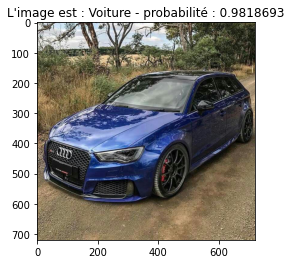

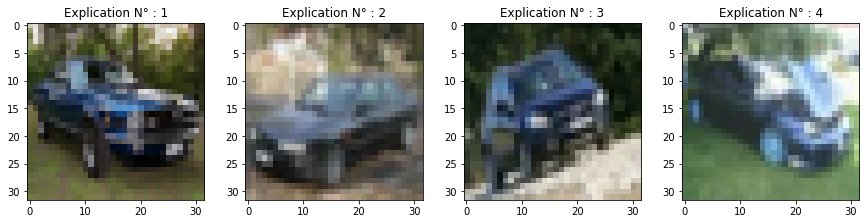

In [90]:
# chargement du chemin de l'image en entrée
img_path = "../my_images/s3_6.jpg"
# Lancer notre fonction (en saisissant le nombre d'explications souhaitées)
twin_CNN_KNN_explainable_Model(img_path,feat_extrac_model,pred_model,explain_model,4)

####### Réalisé par Mohamed Ameziane TOUIL ########
####### twin_CNN_KNN_explainable_Model ########


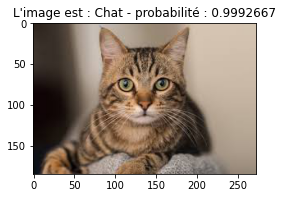

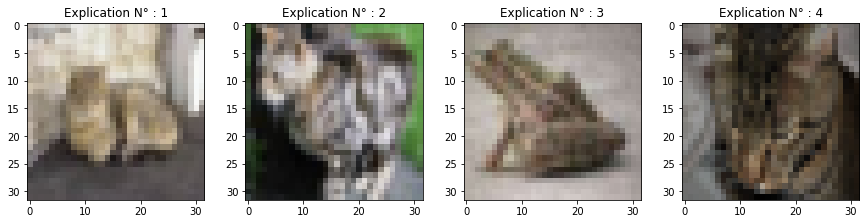

In [91]:
# chargement du chemin de l'image en entrée
img_path = "../my_images/cat.png"
# Lancer notre fonction (en saisissant le nombre d'explications souhaitées)
twin_CNN_KNN_explainable_Model(img_path,feat_extrac_model,pred_model,explain_model,4)

####### Réalisé par Mohamed Ameziane TOUIL ########
####### twin_CNN_KNN_explainable_Model ########


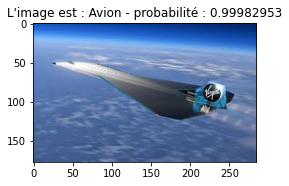

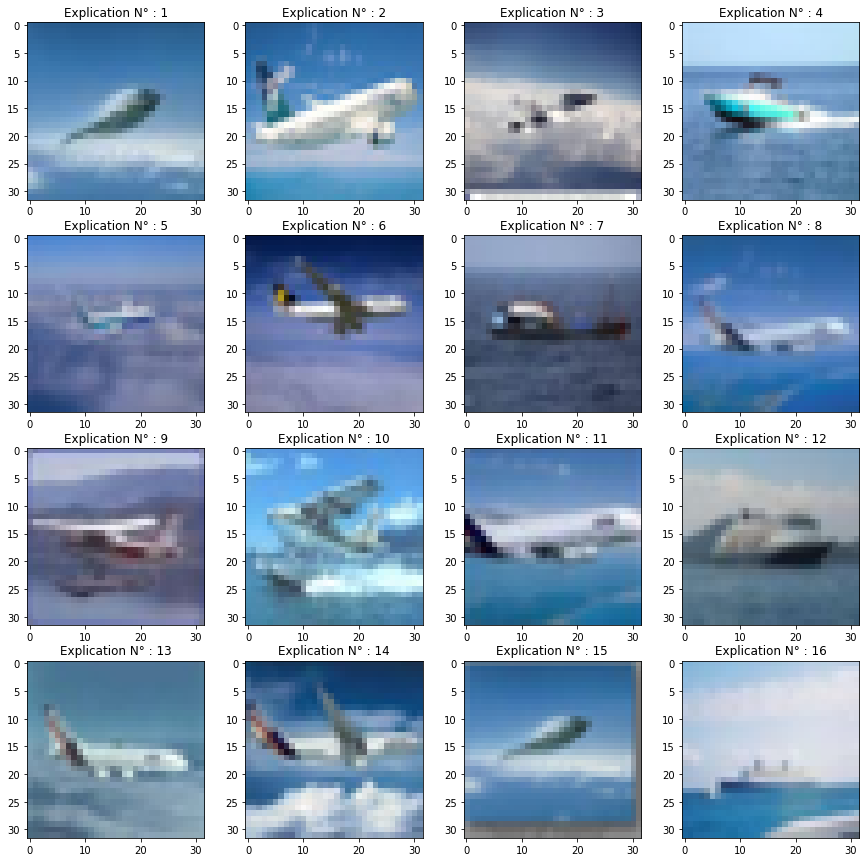

In [92]:
# chargement du chemin de l'image en entrée
img_path = "../my_images/avion5.jpeg"
# Lancer notre fonction (en saisissant le nombre d'explications souhaitées)
twin_CNN_KNN_explainable_Model(img_path,feat_extrac_model,pred_model,explain_model,16)

####### Réalisé par Mohamed Ameziane TOUIL ########
####### twin_CNN_KNN_explainable_Model ########


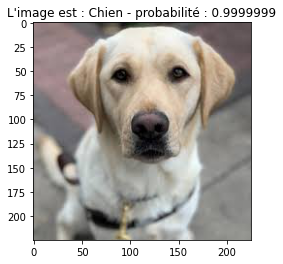

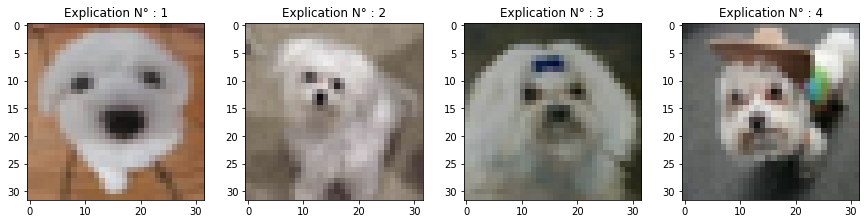

In [93]:
# chargement du chemin de l'image en entrée
img_path = "../my_images/d.jpg"
# Lancer notre fonction (en saisissant le nombre d'explications souhaitées)
twin_CNN_KNN_explainable_Model(img_path,feat_extrac_model,pred_model,explain_model,4)

####### Réalisé par Mohamed Ameziane TOUIL ########
####### twin_CNN_KNN_explainable_Model ########


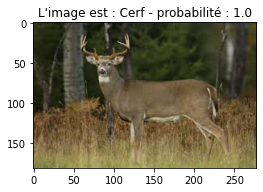

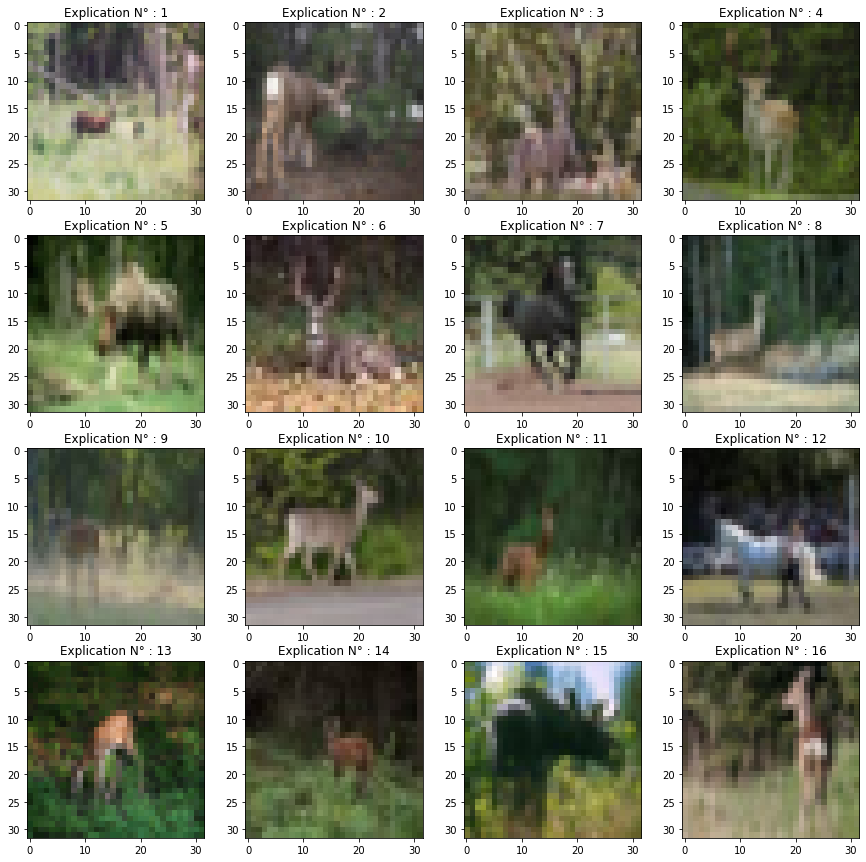

In [94]:
# chargement du chemin de l'image en entrée
img_path = "../my_images/deer3.jpeg"
# Lancer notre fonction (en saisissant le nombre d'explications souhaitées)
twin_CNN_KNN_explainable_Model(img_path,feat_extrac_model,pred_model,explain_model,16)

####### Réalisé par Mohamed Ameziane TOUIL ########
####### twin_CNN_KNN_explainable_Model ########


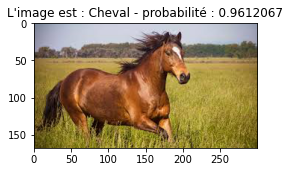

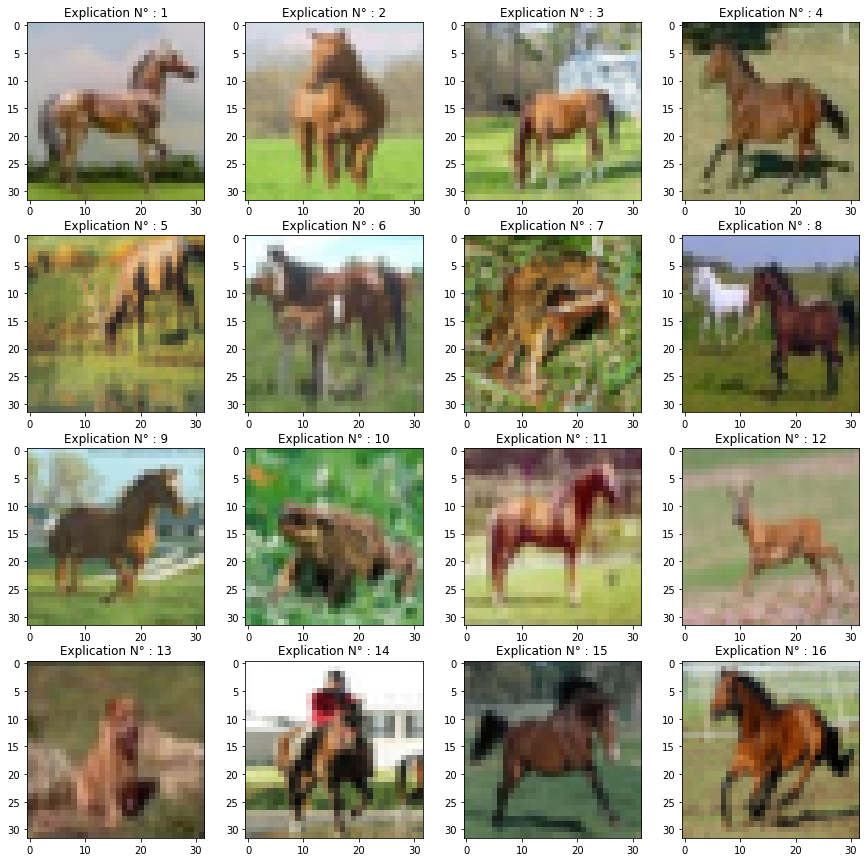

In [95]:
# chargement du chemin de l'image en entrée
img_path = "../my_images/horse1.jpeg"
# Lancer notre fonction (en saisissant le nombre d'explications souhaitées)
twin_CNN_KNN_explainable_Model(img_path,feat_extrac_model,pred_model,explain_model,16)

####### Réalisé par Mohamed Ameziane TOUIL ########
####### twin_CNN_KNN_explainable_Model ########


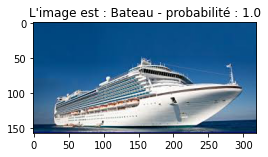

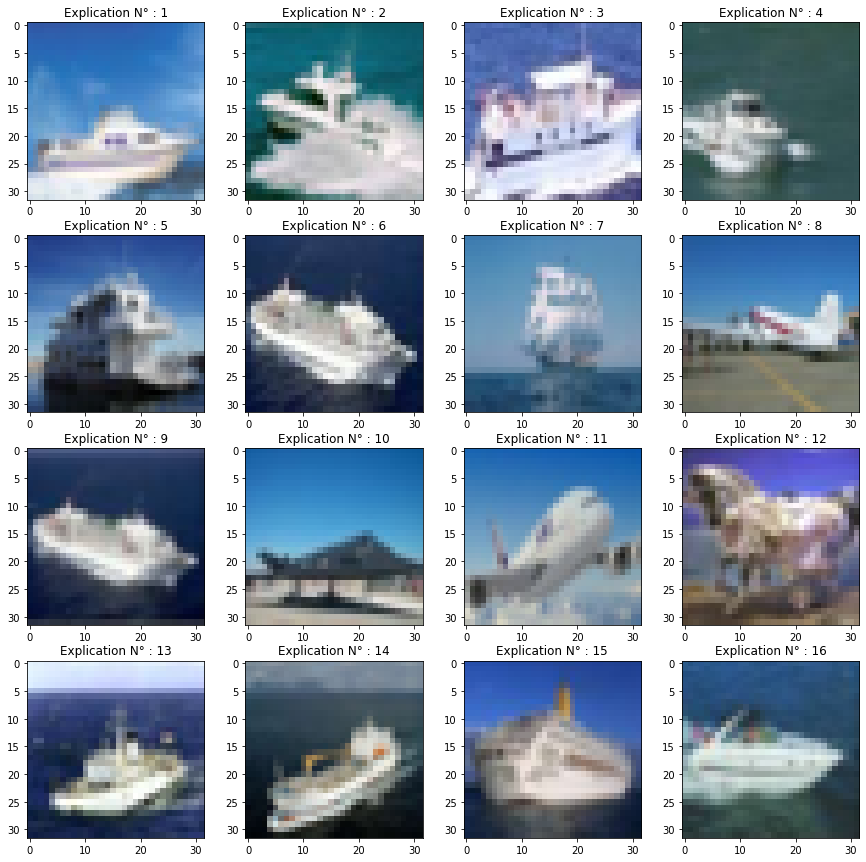

In [66]:
# chargement du chemin de l'image en entrée
img_path = "../my_images/ship1.jpeg"
# Lancer notre fonction (en saisissant le nombre d'explications souhaitées)
twin_CNN_KNN_explainable_Model(img_path,feat_extrac_model,pred_model,explain_model,16)

####### Réalisé par Mohamed Ameziane TOUIL ########
####### twin_CNN_KNN_explainable_Model ########


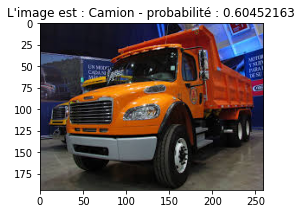

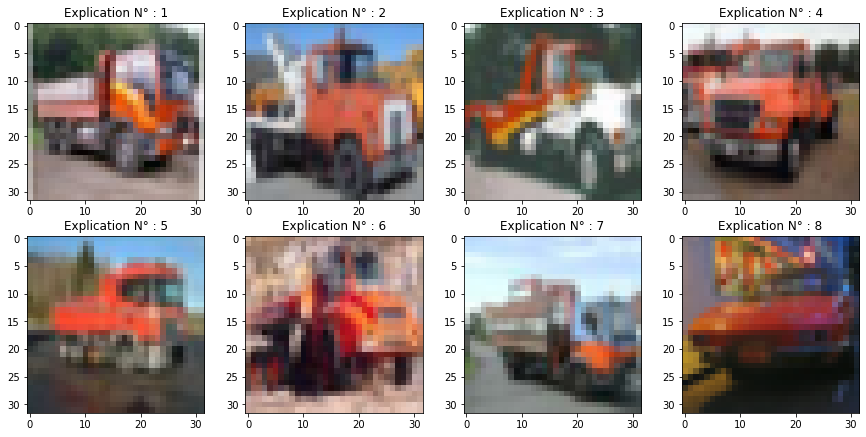

In [68]:
# chargement du chemin de l'image en entrée
img_path = "../my_images/truck1.jpeg"
# Lancer notre fonction (en saisissant le nombre d'explications souhaitées)
twin_CNN_KNN_explainable_Model(img_path,feat_extrac_model,pred_model,explain_model,8)

####### Réalisé par Mohamed Ameziane TOUIL ########
####### twin_CNN_KNN_explainable_Model ########


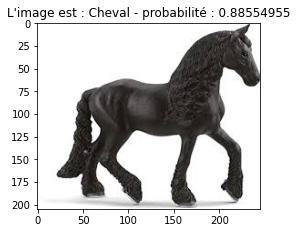

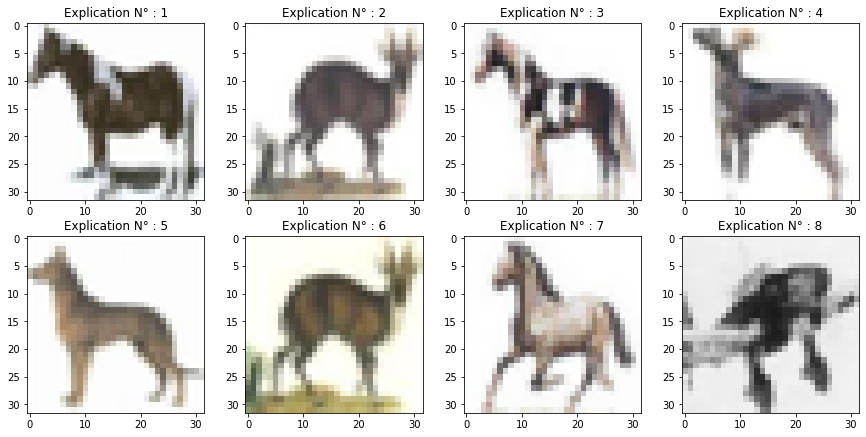

In [96]:
# chargement du chemin de l'image en entrée
img_path = "../my_images/horse4.jpeg"
# Lancer notre fonction (en saisissant le nombre d'explications souhaitées)
twin_CNN_KNN_explainable_Model(img_path,feat_extrac_model,pred_model,explain_model,8)

Dans ce premier cas d'exemple nous avons une bonne prédiction par le module de prédiction, et on obtient les explications qui lui correspondent

### Cas N°2 : Mauvaise prédiction / Explication

####### Réalisé par Mohamed Ameziane TOUIL ########
####### twin_CNN_KNN_explainable_Model ########


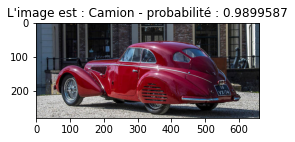

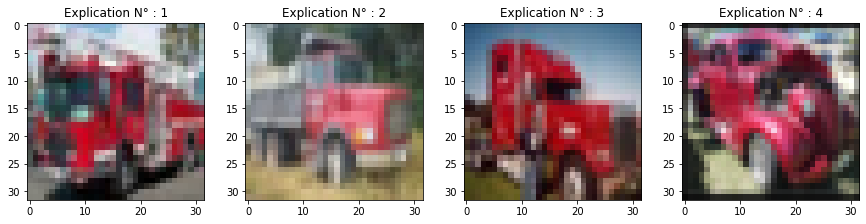

In [97]:
# chargement du chemin de l'image en entrée
img_path = "../my_images/car7.jpg"
# Lancer notre fonction (en saisissant le nombre d'explications souhaitées)
twin_CNN_KNN_explainable_Model(img_path,feat_extrac_model,pred_model,explain_model,4)

####### Réalisé par Mohamed Ameziane TOUIL ########
####### twin_CNN_KNN_explainable_Model ########


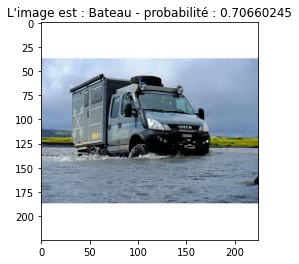

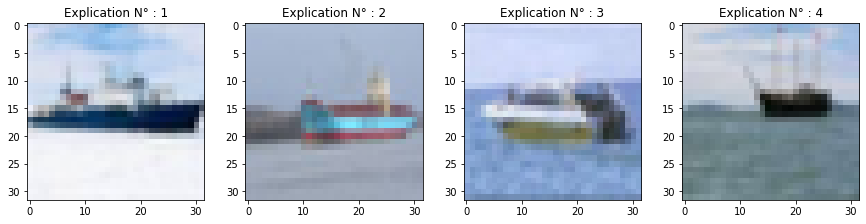

In [98]:
# chargement du chemin de l'image en entrée
img_path = "../my_images/truck10.jpeg"
# Lancer notre fonction (en saisissant le nombre d'explications souhaitées)
twin_CNN_KNN_explainable_Model(img_path,feat_extrac_model,pred_model,explain_model,4)

####### Réalisé par Mohamed Ameziane TOUIL ########
####### twin_CNN_KNN_explainable_Model ########


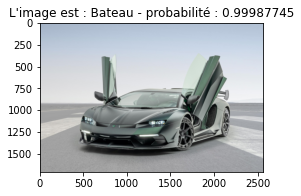

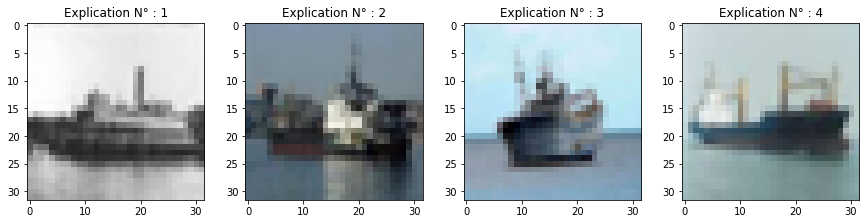

In [99]:
# chargement du chemin de l'image en entrée
img_path = "../my_images/lambo2.jpg"
# Lancer notre fonction (en saisissant le nombre d'explications souhaitées)
twin_CNN_KNN_explainable_Model(img_path,feat_extrac_model,pred_model,explain_model,4)

Dans ce deuxième cas de figure, on a une mauvaise prédiction par notre module de prédiction, puis on obtient les explications visuelles qui lui sont associées.

####### Réalisé par Mohamed Ameziane TOUIL ########
####### twin_CNN_KNN_explainable_Model ########


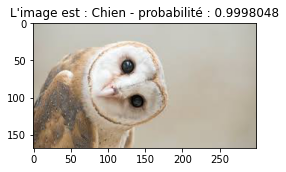

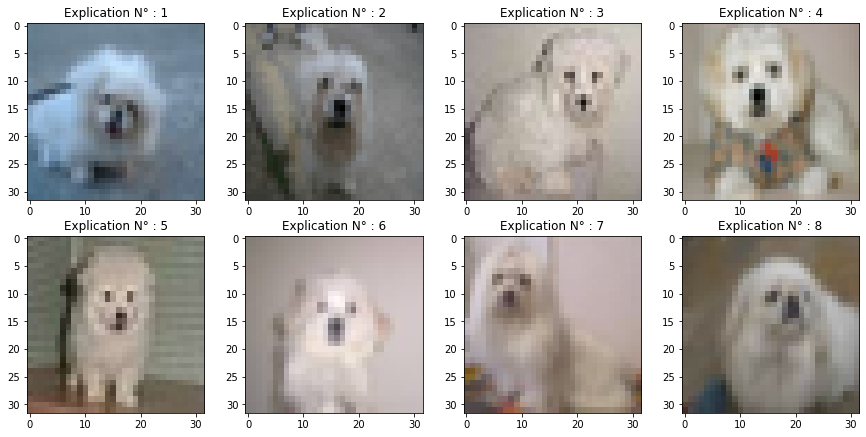

In [100]:
# chargement du chemin de l'image en entrée
img_path = "../my_images/bird3.jpeg"
# Lancer notre fonction (en saisissant le nombre d'explications souhaitées)
twin_CNN_KNN_explainable_Model(img_path,feat_extrac_model,pred_model,explain_model,8)

####### Réalisé par Mohamed Ameziane TOUIL ########
####### twin_CNN_KNN_explainable_Model ########


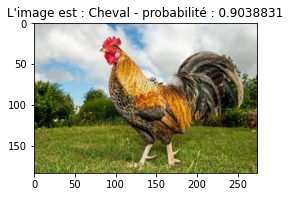

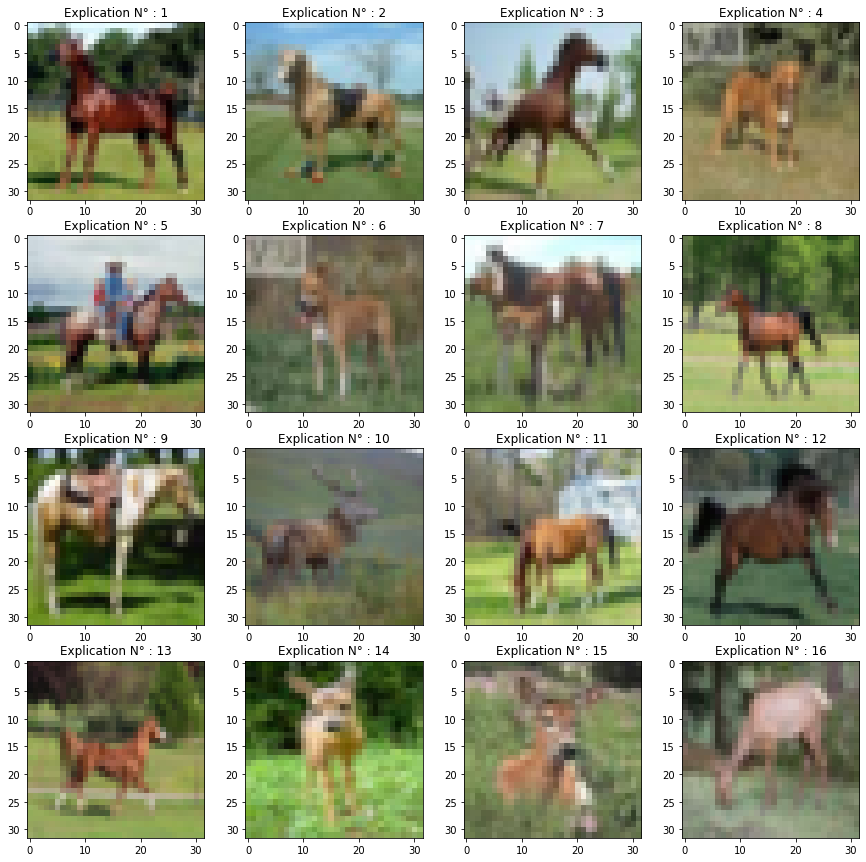

In [103]:
# chargement du chemin de l'image en entrée
img_path = "../my_images/bird6.jpeg"
# Lancer notre fonction (en saisissant le nombre d'explications souhaitées)
twin_CNN_KNN_explainable_Model(img_path,feat_extrac_model,pred_model,explain_model,16)

####### Réalisé par Mohamed Ameziane TOUIL ########
####### twin_CNN_KNN_explainable_Model ########


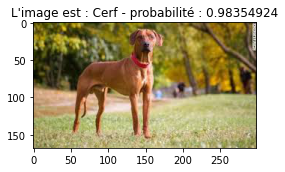

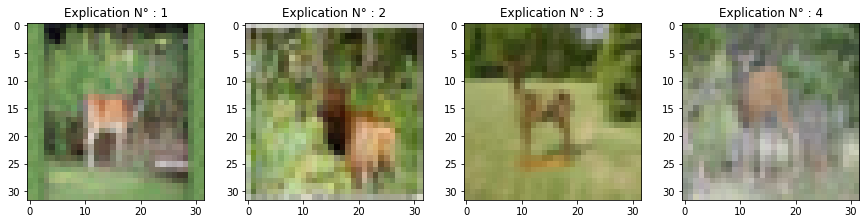

In [102]:
# chargement du chemin de l'image en entrée
img_path = "../my_images/dog1.jpeg"
# Lancer notre fonction (en saisissant le nombre d'explications souhaitées)
twin_CNN_KNN_explainable_Model(img_path,feat_extrac_model,pred_model,explain_model,4)

### Cas N°3 : Classe Inconnue / Explication

####### Réalisé par Mohamed Ameziane TOUIL ########
####### twin_CNN_KNN_explainable_Model ########


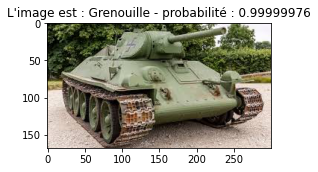

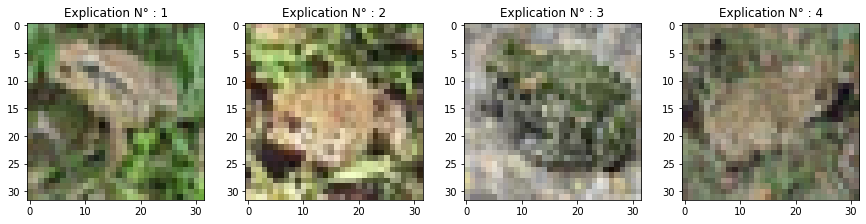

In [104]:
# chargement du chemin de l'image en entrée
img_path = "../my_images/none1.jpeg"
# Lancer notre fonction (en saisissant le nombre d'explications souhaitées)
twin_CNN_KNN_explainable_Model(img_path,feat_extrac_model,pred_model,explain_model,4)

####### Réalisé par Mohamed Ameziane TOUIL ########
####### twin_CNN_KNN_explainable_Model ########


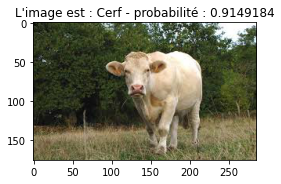

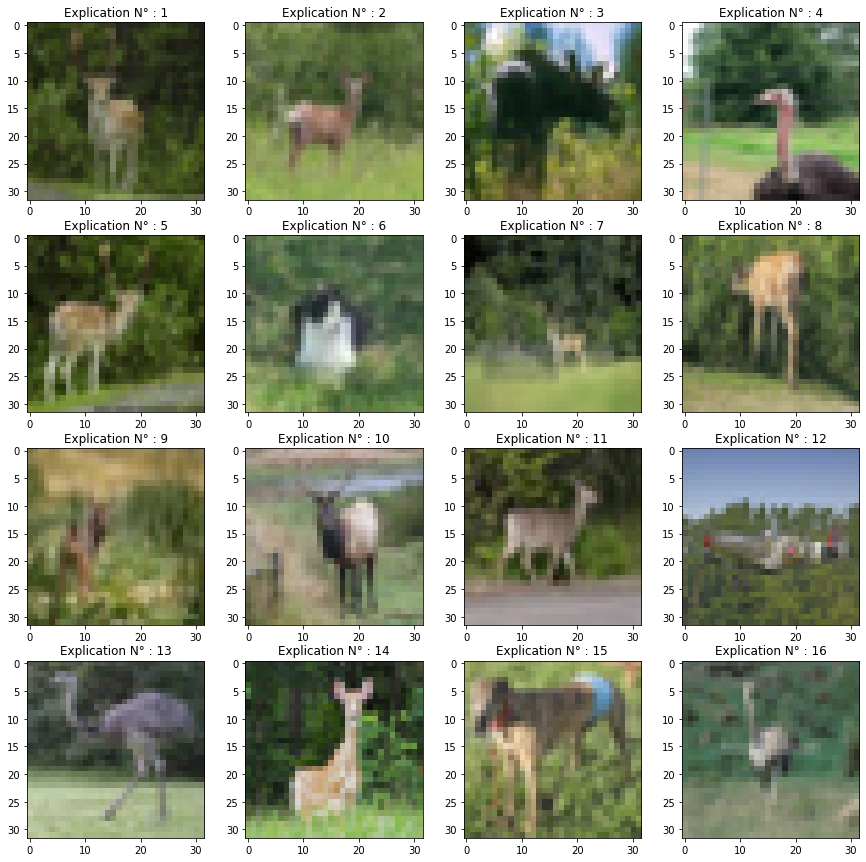

In [105]:
# chargement du chemin de l'image en entrée
img_path = "../my_images/none8.jpeg"
# Lancer notre fonction (en saisissant le nombre d'explications souhaitées)
twin_CNN_KNN_explainable_Model(img_path,feat_extrac_model,pred_model,explain_model,16)

####### Réalisé par Mohamed Ameziane TOUIL ########
####### twin_CNN_KNN_explainable_Model ########


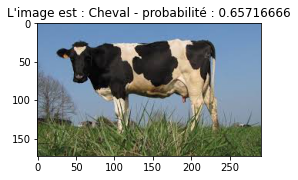

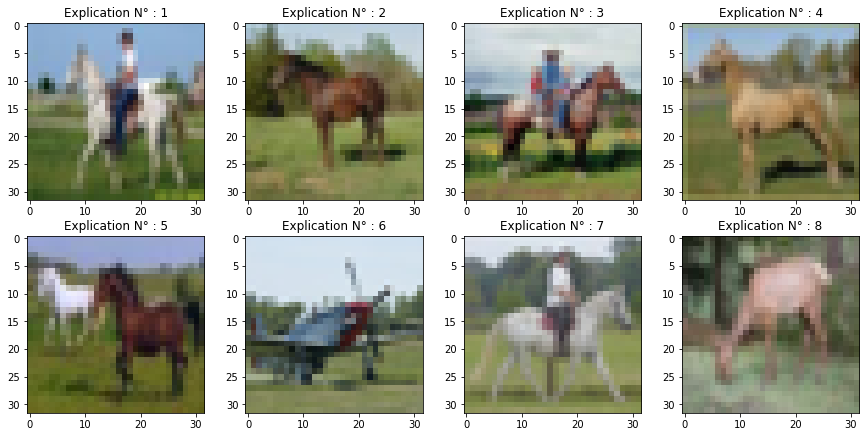

In [106]:
# chargement du chemin de l'image en entrée
img_path = "../my_images/none9.jpeg"
# Lancer notre fonction (en saisissant le nombre d'explications souhaitées)
twin_CNN_KNN_explainable_Model(img_path,feat_extrac_model,pred_model,explain_model,8)